## 0. 환경 설정하기

#### 1) 구글 드라이브 연결하기

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2) 경로 확인하기

In [2]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제 시 그대로 실행 수정 X)
WORK_SPACE = "Colab Notebooks"

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# TUTORIAL 데이터 경로
TUTORIAL_PATH = ROOT_PATH + "/tutorial"
TUTORIAL_IMAGE = ROOT_PATH + "/video"

#### 3) Video Download

In [3]:
# test data 다운로드
!pip install gdown

import gdown
import shutil
import zipfile
 
google_path = 'https://drive.google.com/uc?id='
file_id = '1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca'
output_name = 'video.zip'

# 파일 다운로드
gdown.download(google_path+file_id,output_name,quiet=False)

# 파일 위치 이동
shutil.move("./" + output_name, ROOT_PATH)

zip_file = ROOT_PATH + "/" + output_name

# 압축해제 
with zipfile.ZipFile(zip_file) as z:
    z.extractall(ROOT_PATH)

os.remove(zip_file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca
To: /content/video.zip
100%|██████████| 525M/525M [00:05<00:00, 96.8MB/s]


#### 4) Library Load

In [4]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Load

#### 1) 비디오 데이터 확인하기

In [5]:
import glob

In [6]:
VIDEO_PATH = ROOT_PATH + "/video"

video_list = glob.glob(VIDEO_PATH + '/*.mp4')
video_list

['/content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/sam.mp4',
 '/content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/jung.mp4',
 '/content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/park.mp4',
 '/content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/sayuri.mp4']

In [7]:
for i in range(len(video_list)):
  video = cv2.VideoCapture(video_list[i])

  video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
  video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
  video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
  video_fps = video.get(cv2.CAP_PROP_FPS)

  print('영상 경로 :', video_list[i])
  print('가로 :', video_width)
  print('세로 :', video_height)
  print('총 프레임 수 :', video_length)
  print('FPS :', video_fps)
  print('영상 길이 : %d 초 ' %round(video_length/video_fps))
  print('-------------------------------------------------')

  video.release()

영상 경로 : /content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/sam.mp4
가로 : 854.0
세로 : 480.0
총 프레임 수 : 27001.0
FPS : 30.0
영상 길이 : 900 초 
-------------------------------------------------
영상 경로 : /content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/jung.mp4
가로 : 854.0
세로 : 480.0
총 프레임 수 : 27001.0
FPS : 30.0
영상 길이 : 900 초 
-------------------------------------------------
영상 경로 : /content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/park.mp4
가로 : 854.0
세로 : 480.0
총 프레임 수 : 37801.0
FPS : 30.0
영상 길이 : 1260 초 
-------------------------------------------------
영상 경로 : /content/drive/MyDrive/Colab Notebooks/AIVLE3rd_individual/video/sayuri.mp4
가로 : 854.0
세로 : 480.0
총 프레임 수 : 37801.0
FPS : 30.0
영상 길이 : 1260 초 
-------------------------------------------------


#### 2) 동영상 프레임 단위로 나눠 이미지 데이터 만들기

In [15]:
class_name = ['sam', 'jung', 'park', 'sayuri']
IMAGE_PATH = ROOT_PATH + '/img'
TIME_MEASUREMENT_UNIT = 5

In [9]:
for i in range(len(video_list)):
  video = cv2.VideoCapture(video_list[i])

  while video.isOpened():
    ret, frame = video.read()
    if ret:
      frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
      if frame_sec.is_integer():
        if (frame_sec % TIME_MEASUREMENT_UNIT == 0):
          filename = IMAGE_PATH + '/' + class_name[i] + str(round(frame_sec)) + '.jpg'
          cv2.imwrite(filename, frame)
    else:
      break

  video.release()

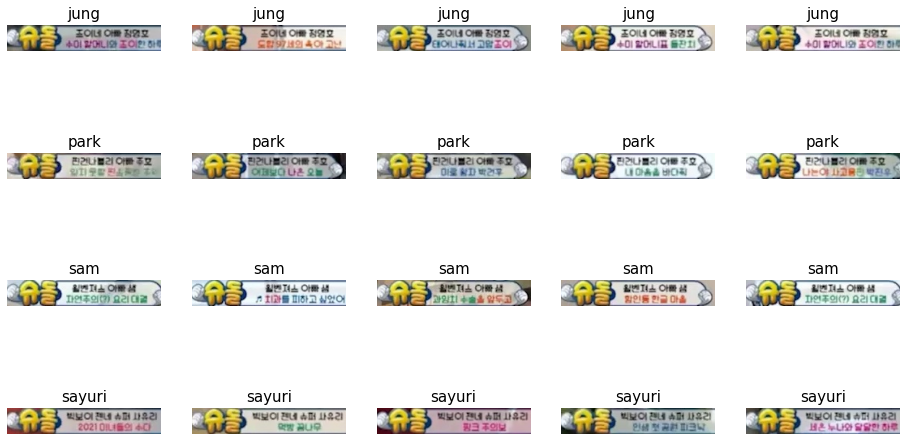

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

class_map = {
    0: 'jung',
    1: 'park',
    2: 'sam',
    3: 'sayuri',
}

image_class = glob.glob(IMAGE_PATH + "*/*")
image_class.sort()

fig, axes = plt.subplots(4, 5, figsize=(16, 9))
class_count = 0

for c in image_class:
  for i in range(5):
    original_image = cv2.imread(c + "/" + str(i*200) + ".jpg")
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    axes[class_count, i].imshow(rgb_image)
    axes[class_count, i].set_title(class_map[class_count], fontsize=15)
    axes[class_count, i].axis('off')
  class_count += 1
plt.show()